In [38]:
#load the library
from pyforest import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [39]:
#lets load the dataset
df=pd.read_csv("Covid_19.csv")
df.head()

<IPython.core.display.Javascript object>

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [40]:
#now check the shape of dataset
df.shape

(23688, 5)

In [41]:
#now look for the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [42]:
#check the null value
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

<IPython.core.display.Javascript object>

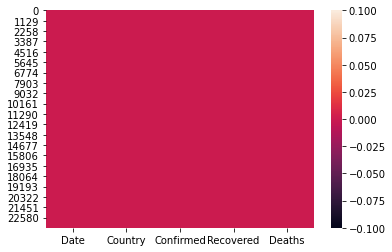

In [43]:
#check the null value with heatmat
sns.heatmap(df.isnull())

Here we see  there is no null value in this dataset

In [44]:
#lets checking the dtypes of dataset
df.dtypes

Date         object
Country      object
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

# Data visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

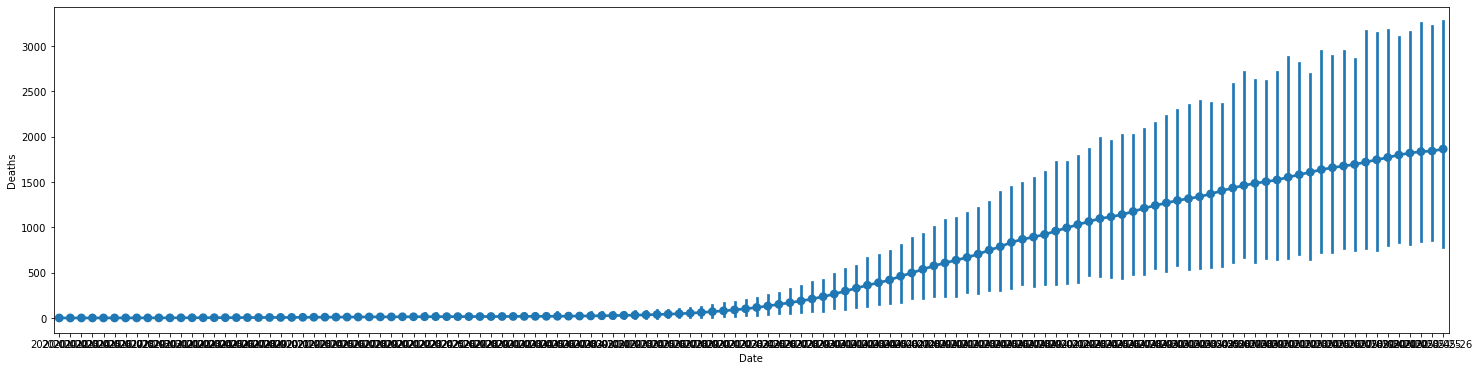

In [45]:
plt.figure(figsize=(25,6))
sns.pointplot(x='Date',y='Deaths',data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

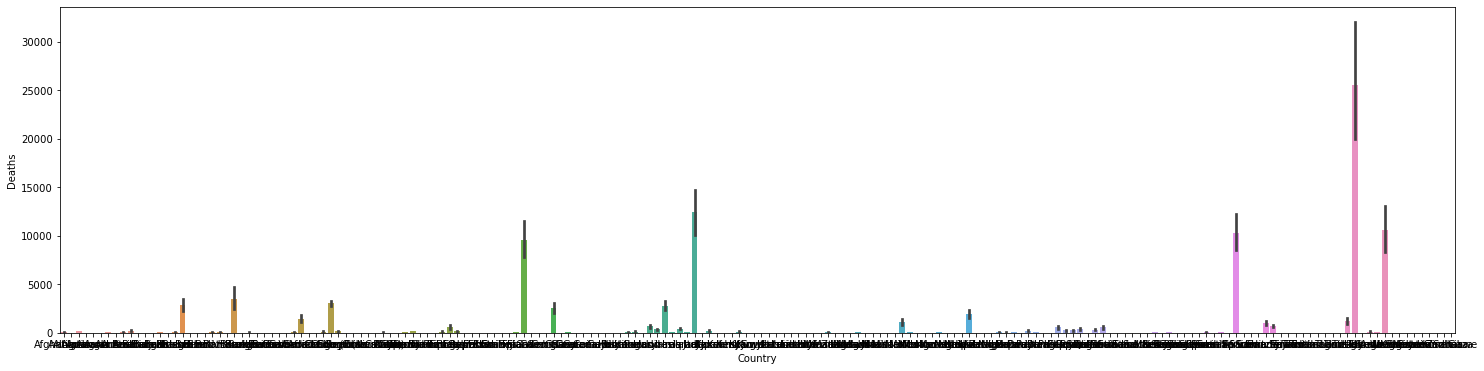

In [46]:
plt.figure(figsize=(25,6))
sns.barplot(x='Country',y='Deaths',data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

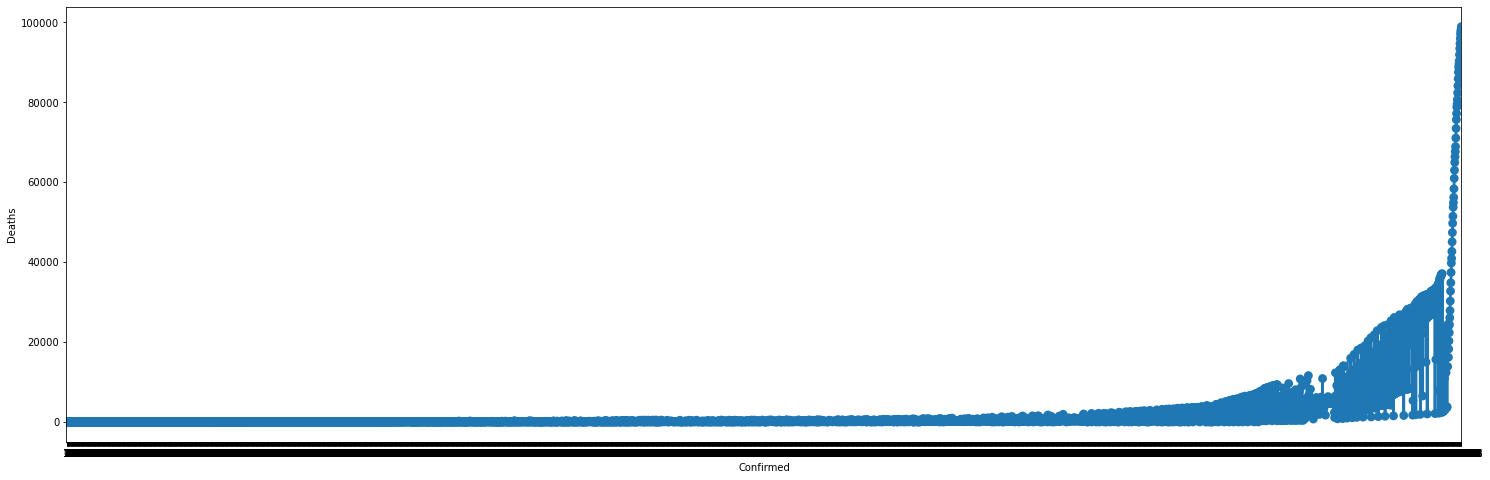

In [47]:
plt.figure(figsize=(25,8))
sns.pointplot(x="Confirmed",y="Deaths",data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

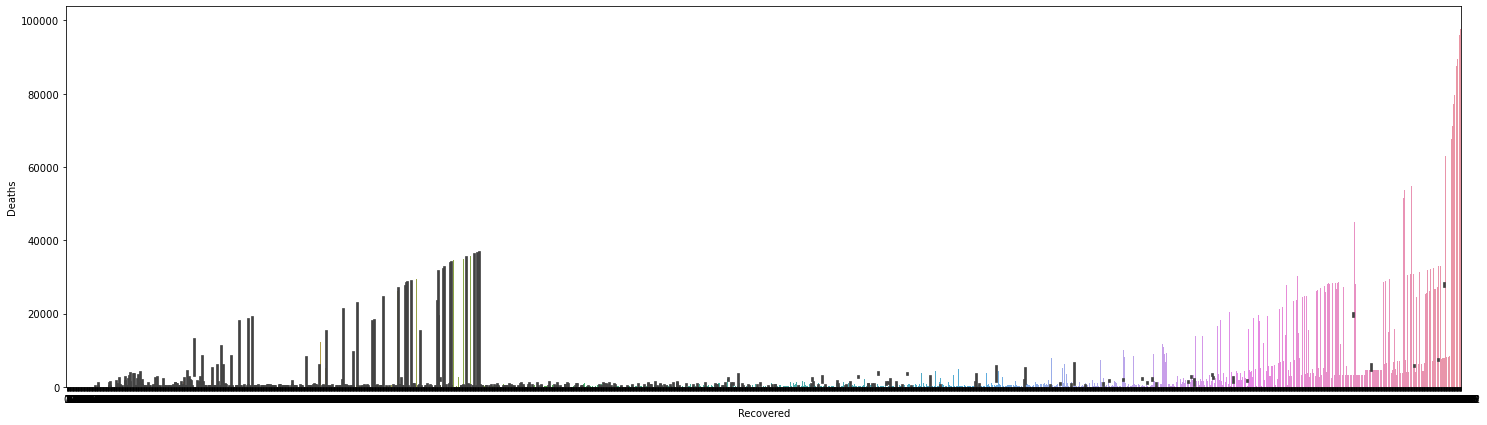

In [48]:
fig=plt.figure(figsize=(25,7))
fig
sns.barplot(x="Recovered",y="Deaths",data=df)

<IPython.core.display.Javascript object>

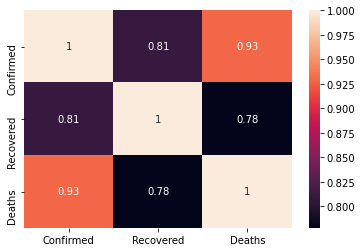

In [49]:
#lets for next correlation
sns.heatmap(df.corr(),annot=True)

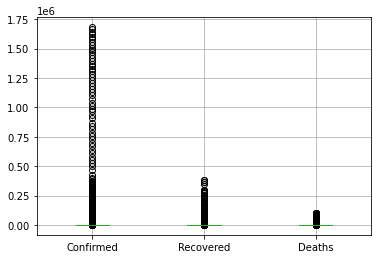

In [50]:
#detecting the outlier with boxplot
df.boxplot()

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=['Date','Country']
for i in col:
    df[i]=le.fit_transform(df[i])

In [52]:
#check the outlier with zscore
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 7932,  8120,  8308,  8496,  8684,  8872,  9060,  9248,  9436,
        9624,  9812, 10000, 10188, 10376, 10564, 10752, 10940, 11128,
       11316, 11504, 11692, 11880, 12068, 12256, 12444, 12632, 12820,
       13008, 13146, 13196, 13245, 13334, 13384, 13433, 13522, 13572,
       13621, 13710, 13760, 13809, 13898, 13948, 13997, 14070, 14086,
       14136, 14185, 14258, 14274, 14274, 14324, 14373, 14446, 14462,
       14462, 14512, 14561, 14634, 14634, 14650, 14650, 14700, 14730,
       14749, 14822, 14822, 14838, 14838, 14888, 14914, 14918, 14937,
       15010, 15010, 15026, 15026, 15076, 15102, 15106, 15125, 15198,
       15198, 15214, 15214, 15264, 15290, 15294, 15313, 15386, 15386,
       15402, 15402, 15452, 15478, 15482, 15501, 15574, 15574, 15590,
       15590, 15594, 15640, 15666, 15670, 15685, 15689, 15762, 15762,
       15778, 15778, 15782, 15828, 15854, 15858, 15873, 15877, 15950,
       15950, 15966, 15966, 15966, 15970, 16016, 16042, 16046, 16061,
       16065, 16138

In [53]:
z[7932][3]

3.13147210893684

In [54]:
df_final=df[(z<3).all(axis=1)]

In [55]:
print(df.shape,df_final.shape)

(23688, 5) (23177, 5)


In [56]:
df_x=df_final.drop(columns=["Deaths"])
y=df_final[["Deaths"]]

In [57]:
#lets make a loop for skew data
for index in df_x.skew().index:
    if df_x.skew().loc[index] >0.55:
        df_x[index]=np.log1p(df_x[index])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
df_x.skew()

Date         0.028720
Country     -0.005144
Confirmed    0.473662
Recovered    0.944097
dtype: float64

In [59]:
#scalling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

<IPython.core.display.Javascript object>

In [60]:
#make a function for getting the betr random_state
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def maxr2_score(regr,df_x,y):
    max_ran_score=0
    for ran_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y,random_state = ran_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",ran_state," is ",r2_scr)
        if r2_scr>max_ran_score:
            max_ran_score=r2_scr
            final_ran_state=ran_state
    print("max r2 score corresponding to ",final_ran_state," is ",max_ran_score*100)
    return final_ran_state

In [61]:
#Build a function for cros_val_score
from sklearn.model_selection import cross_val_score
def kfold (model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    cs=model,c_scores.mean()
    print("Mean r2 score for",cs)
    print("standard deviation in r2 score for",model,c_scores.std())
    print(c_scores)

In [62]:
from sklearn.linear_model import LinearRegression
lnrgr=LinearRegression()
maxr2_score(lnrgr,x,y)

r2 score corresponding to  42  is  0.15116140037611525
r2 score corresponding to  43  is  0.16590256267336756
r2 score corresponding to  44  is  0.174499960251575
r2 score corresponding to  45  is  0.14676049125355917
r2 score corresponding to  46  is  0.15469566593998063
r2 score corresponding to  47  is  0.16198054548456842
r2 score corresponding to  48  is  0.1808946628348086
r2 score corresponding to  49  is  0.1771222299920736
r2 score corresponding to  50  is  0.16314540767248276
r2 score corresponding to  51  is  0.18870324913671965
r2 score corresponding to  52  is  0.1591909303272785
r2 score corresponding to  53  is  0.1834788525195039
r2 score corresponding to  54  is  0.16762169838276586
r2 score corresponding to  55  is  0.18230580884022785
r2 score corresponding to  56  is  0.15283038077021593
r2 score corresponding to  57  is  0.170266869459047
r2 score corresponding to  58  is  0.18572823502697955
r2 score corresponding to  59  is  0.1819362612810712
r2 score correspond

63

In [63]:
kfold(lnrgr,x,y)

Mean r2 score for (LinearRegression(), -0.5015818698438006)
standard deviation in r2 score for LinearRegression() 0.9749654192741406
[-2.39051996 -0.49778076  0.12270657  0.12249063  0.13519418]


In [64]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
kc=KNeighborsRegressor()

neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 29}

In [65]:
knn=KNeighborsRegressor(n_neighbors=29)
maxr2_score(knn,x,y)

r2 score corresponding to  42  is  0.7375363580979457
r2 score corresponding to  43  is  0.7278434593687323
r2 score corresponding to  44  is  0.7550277797266993
r2 score corresponding to  45  is  0.7608711685964956
r2 score corresponding to  46  is  0.709083544242263
r2 score corresponding to  47  is  0.718705075554872
r2 score corresponding to  48  is  0.7551541729450347
r2 score corresponding to  49  is  0.7288492285896273
r2 score corresponding to  50  is  0.7433593636922295
r2 score corresponding to  51  is  0.7446875236766056
r2 score corresponding to  52  is  0.7542947660862843
r2 score corresponding to  53  is  0.742877273101961
r2 score corresponding to  54  is  0.7240042581769863
r2 score corresponding to  55  is  0.7418898324276539
r2 score corresponding to  56  is  0.6768447006717886
r2 score corresponding to  57  is  0.6981277928991929
r2 score corresponding to  58  is  0.7561877132448146
r2 score corresponding to  59  is  0.7065877324986856
r2 score corresponding to  60  

63

In [66]:
from sklearn.ensemble import RandomForestRegressor
rnf=RandomForestRegressor()

parameters={"n_estimators":[10,50,100,150,200,300,350,400,450,500]}
rg = GridSearchCV(rnf, parameters, cv=5,scoring="r2")
rg.fit(x,y)
rg.best_params_

{'n_estimators': 100}

In [67]:
rnd_f=RandomForestRegressor(n_estimators=50)
maxr2_score(rnd_f,x,y)

r2 score corresponding to  42  is  0.9571578747588362
r2 score corresponding to  43  is  0.9739652646295428
r2 score corresponding to  44  is  0.9758547434826951
r2 score corresponding to  45  is  0.9675496513102265
r2 score corresponding to  46  is  0.9715814784684048
r2 score corresponding to  47  is  0.9468932352925755
r2 score corresponding to  48  is  0.9768866483403914
r2 score corresponding to  49  is  0.9623353882457184
r2 score corresponding to  50  is  0.9332914868484949
r2 score corresponding to  51  is  0.9797408932375226
r2 score corresponding to  52  is  0.9815790348729545
r2 score corresponding to  53  is  0.9810522846341267
r2 score corresponding to  54  is  0.9673787804186726
r2 score corresponding to  55  is  0.9535840680063241
r2 score corresponding to  56  is  0.9724220562115586
r2 score corresponding to  57  is  0.9715230005640196
r2 score corresponding to  58  is  0.9410222115577203
r2 score corresponding to  59  is  0.9691083792447764
r2 score corresponding to  6

65

In [68]:
kfold(rnd_f,x,y)

Mean r2 score for (RandomForestRegressor(n_estimators=50), 0.4366780051583083)
standard deviation in r2 score for RandomForestRegressor(n_estimators=50) 0.4202391573734404
[ 0.62293478 -0.39988846  0.58467783  0.67354738  0.70211851]


In [69]:
#Based on above scores we will choose RandomFrorest Regression as our final algorithm
rnd=RandomForestRegressor(n_estimators=50)
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 65,test_size=0.20)
rnd.fit(x_train,y_train)
y_pred = rnd.predict(x_test)

In [70]:
#Lets find the rmse and r2_score using sklearn.metrics for Linear Regressor model
print("MSE is: ",mean_squared_error(y_test,y_pred))
print("r2_score is: ",r2_score(y_test,y_pred)*100)

MSE is:  6190.319414495255
r2_score is:  98.52107001364287


In [71]:
#Lets save the model using joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(rnd, 'covid.pkl')

['covid.pkl']